In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data_original =  pd.read_csv("/content/credit_risk_dataset.csv")
data = pd.read_csv("/content/credit_risk_dataset.csv")

In [ ]:
data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


## **Dealing with Null Values**

In [ ]:
data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [ ]:
# drop values that are null
data.dropna(axis=0,inplace=True)

In [ ]:
data.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [ ]:
data['loan_status'].value_counts()

0    22435
1     6203
Name: loan_status, dtype: int64

## **Dealing with Outliers**

In [ ]:
data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,28638.000000,2.863800e+04,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000
mean,27.727216,6.664937e+04,4.788672,9656.493121,11.039867,0.216600,0.169488,5.793736
std,6.310441,6.235645e+04,4.154627,6329.683361,3.229372,0.411935,0.106393,4.038483
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.948000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.595600e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [ ]:
#person_age max 144 (issue)
#person_emp_length max 123 (issue)
data.reset_index(inplace = True)

<BarContainer object of 57 artists>

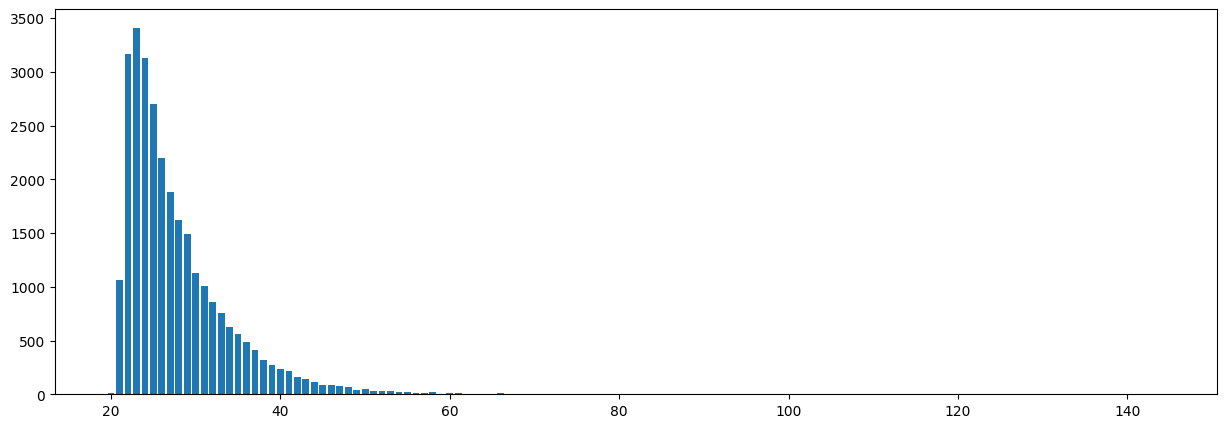

In [ ]:
import matplotlib.pyplot as plt
verti = data['person_age'].value_counts().values
hori = data['person_age'].value_counts().index
fig = plt.figure(figsize = (15, 5))
plt.bar(hori, verti)
# after 80 it is rare

In [ ]:
(data['person_age'].value_counts().values>90).sum()
# dropping rows that have age greater than 90

25

## **Creating New Features by Grouping**

In [ ]:
max_ = data['person_age'].max()
min_ = data['person_age'].min()
print(f"maximum {max_}")
print(f"minimum {min_}")

maximum 144
minimum 20


In [ ]:
data = data.drop(data[data['person_age'] > 80].index, axis=0)
#dropping age above 80

In [ ]:
# people with an age between x and y
def age_group(arr):
    lenarr = len(arr)
    for i in range(0,lenarr-1):
        next = arr[i]+1
        num_people = data['person_age'].between(next,arr[i+1]).sum()
        print(f'There are {num_people} people with an age between {next} and {arr[i+1]}.')

age_group([0 ,18, 26, 36, 46, 56, 66])

print(data.shape[0])

There are 0 people with an age between 1 and 18.
There are 15682 people with an age between 19 and 26.
There are 10422 people with an age between 27 and 36.
There are 2054 people with an age between 37 and 46.
There are 372 people with an age between 47 and 56.
There are 87 people with an age between 57 and 66.
28633


In [ ]:
data['age_group'] = pd.cut(data['person_age'],
                           bins=[20, 26, 36, 46, 56, 66],
                           labels=['20-25', '26-35', '36-45', '46-55', '56-65'])

In [ ]:
data['age_group'].dtype

CategoricalDtype(categories=['20-25', '26-35', '36-45', '46-55', '56-65'], ordered=True)

In [ ]:
data.head()

,index,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group
0,0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,20-25
1,1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,20-25
2,2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,20-25
3,3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,20-25
4,4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,20-25


In [ ]:
data.shape

(28633, 14)

**Income Group**

In [ ]:
max_ = data['person_income'].max()
min_ = data['person_income'].min()

print(f"maximum {max_}")
print(f"minimum {min_}")

maximum 2039784
minimum 4000


In [ ]:
# people with an income between x and y
def income_group(arr):
    lenarr = len(arr)
    for i in range(0,lenarr-1):
        next = arr[i]+1
        num_people = data['person_income'].between(next,arr[i+1]).sum()
        print(f'There are {num_people} people with an income between {next} and {arr[i+1]}.')

income_group([0, 25000, 50000, 75000, 100000,float('inf')])

print(data.shape[0])

There are 1972 people with an income between 1 and 25000.
There are 10198 people with an income between 25001 and 50000.
There are 8532 people with an income between 50001 and 75000.
There are 4197 people with an income between 75001 and 100000.
There are 3734 people with an income between 100001 and inf.
28633


In [ ]:
data['income_group'] = pd.cut(data['person_income'],
                              bins=[0, 25000, 50000, 75000, 100000, float('inf')],
                              labels=['low', 'low-middle', 'middle', 'high-middle', 'high'])

In [ ]:
data['income_group']

0             middle
1                low
2                low
3             middle
4             middle
            ...     
28633         middle
28634           high
28635    high-middle
28636           high
28637     low-middle
Name: income_group, Length: 28633, dtype: category
Categories (5, object): ['low' < 'low-middle' < 'middle' < 'high-middle' < 'high']

**LOAN AMOUNT**

In [ ]:
max_loan_amount = data['loan_amnt'].max()
min_loan_amount = data['loan_amnt'].min()

print(f"maximum {max_loan_amount}")
print(f"minimum {min_loan_amount}")

maximum 35000
minimum 500


In [ ]:
# people with an income between x and y
def loan_amount_group(arr):
    lenarr = len(arr)
    for i in range(0,lenarr-1):
        next = arr[i]+1
        num_people = data['loan_amnt'].between(next,arr[i+1]).sum()
        print(f'There are {num_people} people with an loan_amount between {next} and {arr[i+1]}.')

loan_amount_group([0, 5000, 10000, 15000, float('inf')])

print(data.shape[0])

There are 8182 people with an loan_amount between 1 and 5000.
There are 10608 people with an loan_amount between 5001 and 10000.
There are 5430 people with an loan_amount between 10001 and 15000.
There are 4413 people with an loan_amount between 15001 and inf.
28633


In [ ]:
data['loan_status_desc'] = pd.cut(data['loan_status'],
                                   bins=[0, 1, float('inf')],
                                   labels=['layak', 'tidak layak'])

In [ ]:
data['loan_status_desc']

0          NaN
1        layak
2        layak
3        layak
4        layak
         ...  
28626      NaN
28627      NaN
28628    layak
28629      NaN
28630      NaN
Name: loan_status_desc, Length: 28631, dtype: category
Categories (2, object): ['layak' < 'tidak layak']

In [ ]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group,income_group,loan_amount_group,loan_to_income_ratio,loan_to_emp_lendata.columnsgth_ratio,int_rate_to_loan_amt_ratio,loan_status_desc
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,20-25,low,small,0.104167,0.005000,0.011140,NaN
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,20-25,low,medium,0.572917,0.000182,0.002340,layak
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,20-25,middle,very large,0.534351,0.000114,0.000435,layak
3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,20-25,middle,very large,0.643382,0.000229,0.000408,layak
4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,20-25,low,small,0.252525,0.000800,0.002856,layak


In [ ]:
data['loan_amount_group']

0        very large
1             small
2            medium
3        very large
4        very large
            ...    
28633        medium
28634    very large
28635    very large
28636         large
28637        medium
Name: loan_amount_group, Length: 28633, dtype: category
Categories (4, object): ['small' < 'medium' < 'large' < 'very large']

In [ ]:
data['loan_amount_group'] = pd.cut(data['loan_amnt'],
                                   bins=[0, 5000, 10000, 15000, float('inf')],
                                   labels=['small', 'medium', 'large', 'very large'])

In [ ]:
data = data.drop(data[data['person_emp_length'] > 60].index, axis=0)

In [ ]:
data = data.drop(['index'], axis=1)
data.reset_index(inplace = True)
data = data.drop(['index'], axis=1)

In [ ]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group,income_group,loan_amount_group
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,20-25,low,small
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,20-25,low,medium
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,20-25,middle,very large
3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,20-25,middle,very large
4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,20-25,low,small


In [ ]:
data['person_home_ownership'].value_counts()

RENT        14548
MORTGAGE    11797
OWN          2192
OTHER          94
Name: person_home_ownership, dtype: int64

In [ ]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group,income_group,loan_amount_group
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,20-25,low,small
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,20-25,low,medium
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,20-25,middle,very large
3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,20-25,middle,very large
4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,20-25,low,small


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-33-802a6a738d72>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<Axes: >

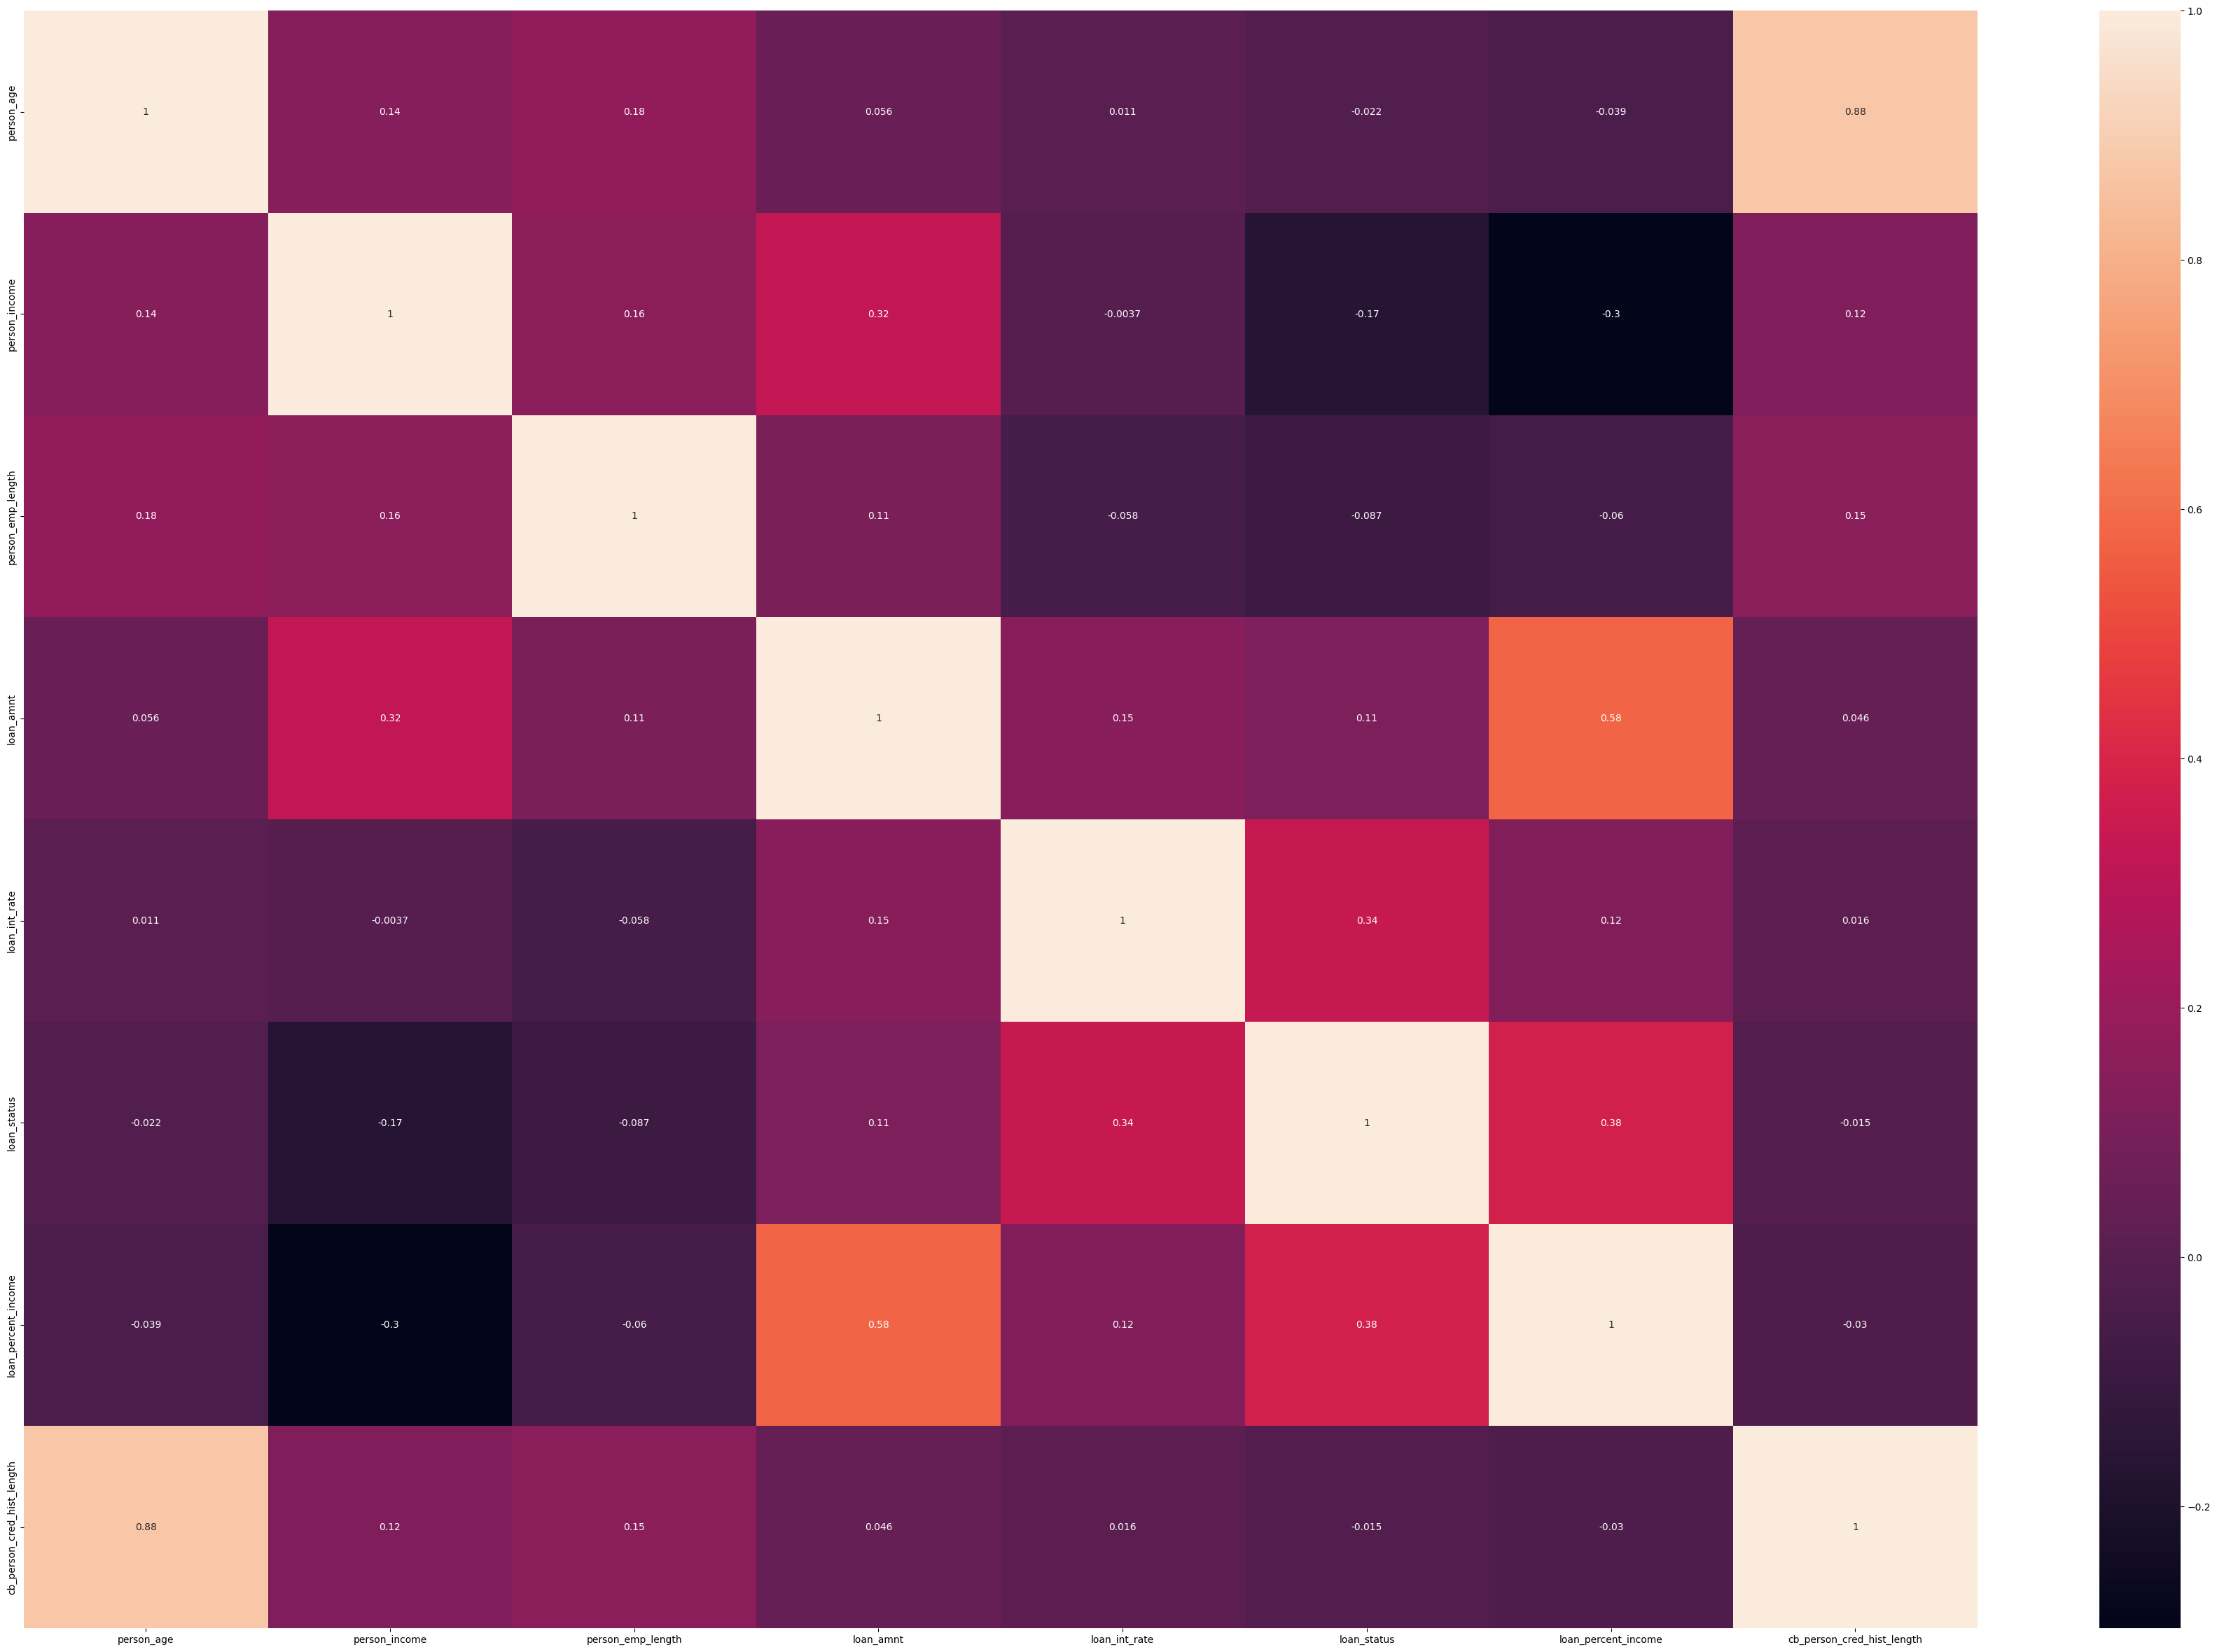

In [ ]:
plt.figure(figsize=(45,30))
sns.heatmap(data.corr(), annot=True)

In [ ]:
import pandas as pd

writer = pd.ExcelWriter('datacredit.xlsx')
data.to_excel(writer, sheet_name='Sheet1', index=False)
writer.save()

<ipython-input-34-00b9021defa1>:5: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


## **Creating New Features**

In [ ]:
# Create loan-to-income ratio
data['loan_to_income_ratio'] = data['loan_amnt'] / data['person_income']

# Create loan-to-employment length ratio
data['loan_to_emp_lendata.columnsgth_ratio'] =  data['person_emp_length']/ data['loan_amnt']

# Create interest rate-to-loan amount ratio
data['int_rate_to_loan_amt_ratio'] = data['loan_int_rate'] / data['loan_amnt']

New Feature
1. Loan to income
2. Loan to empt length ratio
3. Interest rate

In [ ]:
data.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length', 'age_group',
       'income_group', 'loan_amount_group', 'loan_to_income_ratio',
       'loan_to_emp_lendata.columnsgth_ratio', 'int_rate_to_loan_amt_ratio'],
      dtype='object')

In [ ]:
raw_data = data

## **Feature Engineering**

In [ ]:
col_list = ['person_age',#
 'person_income',#
 'person_home_ownership',#
 'person_emp_length',#
 'loan_intent', #
 'loan_grade',#
 'loan_amnt',#
 'loan_int_rate',#
 'loan_status',#
 'loan_percent_income',#
 'cb_person_default_on_file',#
 'cb_person_cred_hist_length',
'age_group','income_group','loan_amount_group']

drop_colums = []
scale_cols = ['person_income','person_age','person_emp_length', 'loan_amnt','loan_int_rate','cb_person_cred_hist_length','loan_percent_income','loan_to_income_ratio', 'loan_to_emp_length_ratio',
       'int_rate_to_loan_amt_ratio']
ohe_colums = ['cb_person_default_on_file','loan_grade', 'person_home_ownership','loan_intent','income_group','age_group','loan_amount_group']
le_colums = []

In [ ]:
data = data.drop(drop_colums, axis=1)

In [ ]:
data.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length', 'age_group',
       'income_group', 'loan_amount_group', 'loan_to_income_ratio',
       'loan_to_emp_lendata.columnsgth_ratio', 'int_rate_to_loan_amt_ratio'],
      dtype='object')

In [ ]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group,income_group,loan_amount_group,loan_to_income_ratio,loan_to_emp_lendata.columnsgth_ratio,int_rate_to_loan_amt_ratio
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,20-25,low,small,0.104167,0.005000,0.011140
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,20-25,low,medium,0.572917,0.000182,0.002340
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,20-25,middle,very large,0.534351,0.000114,0.000435
3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,20-25,middle,very large,0.643382,0.000229,0.000408
4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,20-25,low,small,0.252525,0.000800,0.002856


In [ ]:
X = data.drop(['loan_status'], axis=1)
Y = data['loan_status']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=12)

In [ ]:
print(x_train.shape,x_test.shape)

(22904, 17) (5727, 17)


In [ ]:
x_train.reset_index(inplace = True)
x_test.reset_index(inplace = True)

In [ ]:
x_train.columns

Index(['index', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'age_group', 'income_group',
       'loan_amount_group', 'loan_to_income_ratio',
       'loan_to_emp_lendata.columnsgth_ratio', 'int_rate_to_loan_amt_ratio'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe.fit(x_train[ohe_colums])

OneHotEncoder()

In [ ]:
ohe.categories_

[array(['N', 'Y'], dtype=object),
 array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object),
 array(['MORTGAGE', 'OTHER', 'OWN', 'RENT'], dtype=object),
 array(['DEBTCONSOLIDATION', 'EDUCATION', 'HOMEIMPROVEMENT', 'MEDICAL',
        'PERSONAL', 'VENTURE'], dtype=object),
 array(['high', 'high-middle', 'low', 'low-middle', 'middle'], dtype=object),
 array(['20-25', '26-35', '36-45', '46-55', '56-65', nan], dtype=object),
 array(['large', 'medium', 'small', 'very large'], dtype=object)]

In [ ]:
merge_ohe_col = np.concatenate((ohe.categories_[0],
                ohe.categories_[1],
                ohe.categories_[2],
                ohe.categories_[3],
                ohe.categories_[4],
                ohe.categories_[5],
                ohe.categories_[6],))

In [ ]:
merge_ohe_col

array(['N', 'Y', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'MORTGAGE', 'OTHER',
       'OWN', 'RENT', 'DEBTCONSOLIDATION', 'EDUCATION', 'HOMEIMPROVEMENT',
       'MEDICAL', 'PERSONAL', 'VENTURE', 'high', 'high-middle', 'low',
       'low-middle', 'middle', '20-25', '26-35', '36-45', '46-55',
       '56-65', nan, 'large', 'medium', 'small', 'very large'],
      dtype=object)

In [ ]:
ohe_data = pd.DataFrame(ohe.transform(x_train[ohe_colums]).toarray(), columns=merge_ohe_col)
ohe_data2 = pd.DataFrame(ohe.transform(x_test[ohe_colums]).toarray(),columns=merge_ohe_col)

In [ ]:
X_new = pd.concat([ohe_data, x_train], axis=1)
X_new = X_new.drop(ohe_colums, axis=1)


X_new_test = pd.concat([ohe_data2, x_test], axis=1)
X_new_test = X_new_test.drop(ohe_colums, axis=1)

In [ ]:
X_new.head()
X_new.shape

(22904, 45)

In [ ]:
X_new_test.head()

,N,Y,A,B,C,D,E,F,G,MORTGAGE,...,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_to_income_ratio,loan_to_emp_lendata.columnsgth_ratio,int_rate_to_loan_amt_ratio
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,35,66000,4.0,3000,6.03,0.05,7,0.045455,0.001333,0.002010
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,35,33144,3.0,8400,14.91,0.25,8,0.253440,0.000357,0.001775
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,32,36000,4.0,6000,16.07,0.17,10,0.166667,0.000667,0.002678
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,25,61500,1.0,18000,13.23,0.29,2,0.292683,0.000056,0.000735
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,32,24000,7.0,2800,10.99,0.12,9,0.116667,0.002500,0.003925


In [ ]:
X_new_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5727 entries, 0 to 5726
Data columns (total 45 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   N                                     5727 non-null   float64
 1   Y                                     5727 non-null   float64
 2   A                                     5727 non-null   float64
 3   B                                     5727 non-null   float64
 4   C                                     5727 non-null   float64
 5   D                                     5727 non-null   float64
 6   E                                     5727 non-null   float64
 7   F                                     5727 non-null   float64
 8   G                                     5727 non-null   float64
 9   MORTGAGE                              5727 non-null   float64
 10  OTHER                                 5727 non-null   float64
 11  OWN              

## **Modeling**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb

In [ ]:
svc = SVC()
knc = KNeighborsClassifier() #algorithm='ball_tree', leaf_size=10, n_neighbors=18, p=1, weights='distance'
mnb = MultinomialNB()
dtc = DecisionTreeClassifier()
lrc = LogisticRegression()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
bc = BaggingClassifier()
etc = ExtraTreesClassifier()
gbdt = GradientBoostingClassifier()
xgb = XGBClassifier()
lgb = lgb.LGBMClassifier(colsample_bytree= 0.7378703019867917,learning_rate= 0.007929963347654646,max_depth=5,min_child_weight= 0.05345076003503776,num_leaves= 20,subsample= 0.892939141154265)

#best #colsample_bytree= 0.7378703019867917,learning_rate= 0.007929963347654646,max_depth=5,min_child_weight= 0.05345076003503776,num_leaves= 20,subsample= 0.892939141154265
#colsample_bytree= 1.0,learning_rate= 0.1,max_depth=11,min_child_weight= 1e-05,num_leaves= 1024,subsample=1.0

In [ ]:
clfs = {
    'KN' : knc,
    'xgb':xgb,
    'lgb':lgb
}

In [ ]:
from sklearn.metrics import precision_score,accuracy_score
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [ ]:
X_new = X_new.drop(columns=[col for col in X_new.columns if pd.isna(col)], axis=1)
X_new_test = X_new_test.drop(columns=[col for col in X_new_test.columns if pd.isna(col)], axis=1)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_new,y_train,X_new_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  KN
Accuracy -  0.8438973284442116
Precision -  0.7182044887780549
For  xgb
Accuracy -  0.9442989348699145
Precision -  0.9782833505687694
For  lgb
Accuracy -  0.9001222280426052
Precision -  1.0
